In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('health_lifestyle_classification.csv')
data.head(3)

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy


In [3]:
data.isna().sum()

survey_code                     0
age                             0
gender                          0
height                          0
weight                          0
bmi                             0
bmi_estimated                   0
bmi_scaled                      0
bmi_corrected                   0
waist_size                      0
blood_pressure               7669
heart_rate                  14003
cholesterol                     0
glucose                         0
insulin                     15836
sleep_hours                     0
sleep_quality                   0
work_hours                      0
physical_activity               0
daily_steps                  8329
calorie_intake                  0
sugar_intake                    0
alcohol_consumption         42387
smoking_level                   0
water_intake                    0
screen_time                     0
stress_level                    0
mental_health_score             0
mental_health_support           0
education_leve

In [4]:
print("Dataset Shape: ",data.shape)

Dataset Shape:  (100000, 48)


In [7]:
print("Feature Data Types: ")
print(data.dtypes)

Feature Data Types: 
survey_code                   int64
age                           int64
gender                       object
height                      float64
weight                      float64
bmi                         float64
bmi_estimated               float64
bmi_scaled                  float64
bmi_corrected               float64
waist_size                  float64
blood_pressure              float64
heart_rate                  float64
cholesterol                 float64
glucose                     float64
insulin                     float64
sleep_hours                 float64
sleep_quality                object
work_hours                  float64
physical_activity           float64
daily_steps                 float64
calorie_intake              float64
sugar_intake                float64
alcohol_consumption          object
smoking_level                object
water_intake                float64
screen_time                 float64
stress_level                  int64
mental_

In [8]:
print("Missing Values")
missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100
missing_data = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print(missing_data[missing_data['Missing Count'] > 0])

Missing Values
                     Missing Count  Missing %
blood_pressure                7669      7.669
heart_rate                   14003     14.003
insulin                      15836     15.836
daily_steps                   8329      8.329
alcohol_consumption          42387     42.387
income                        8470      8.470
exercise_type                24969     24.969
caffeine_intake              33261     33.261
gene_marker_flag             10474     10.474


## Visualize missing values

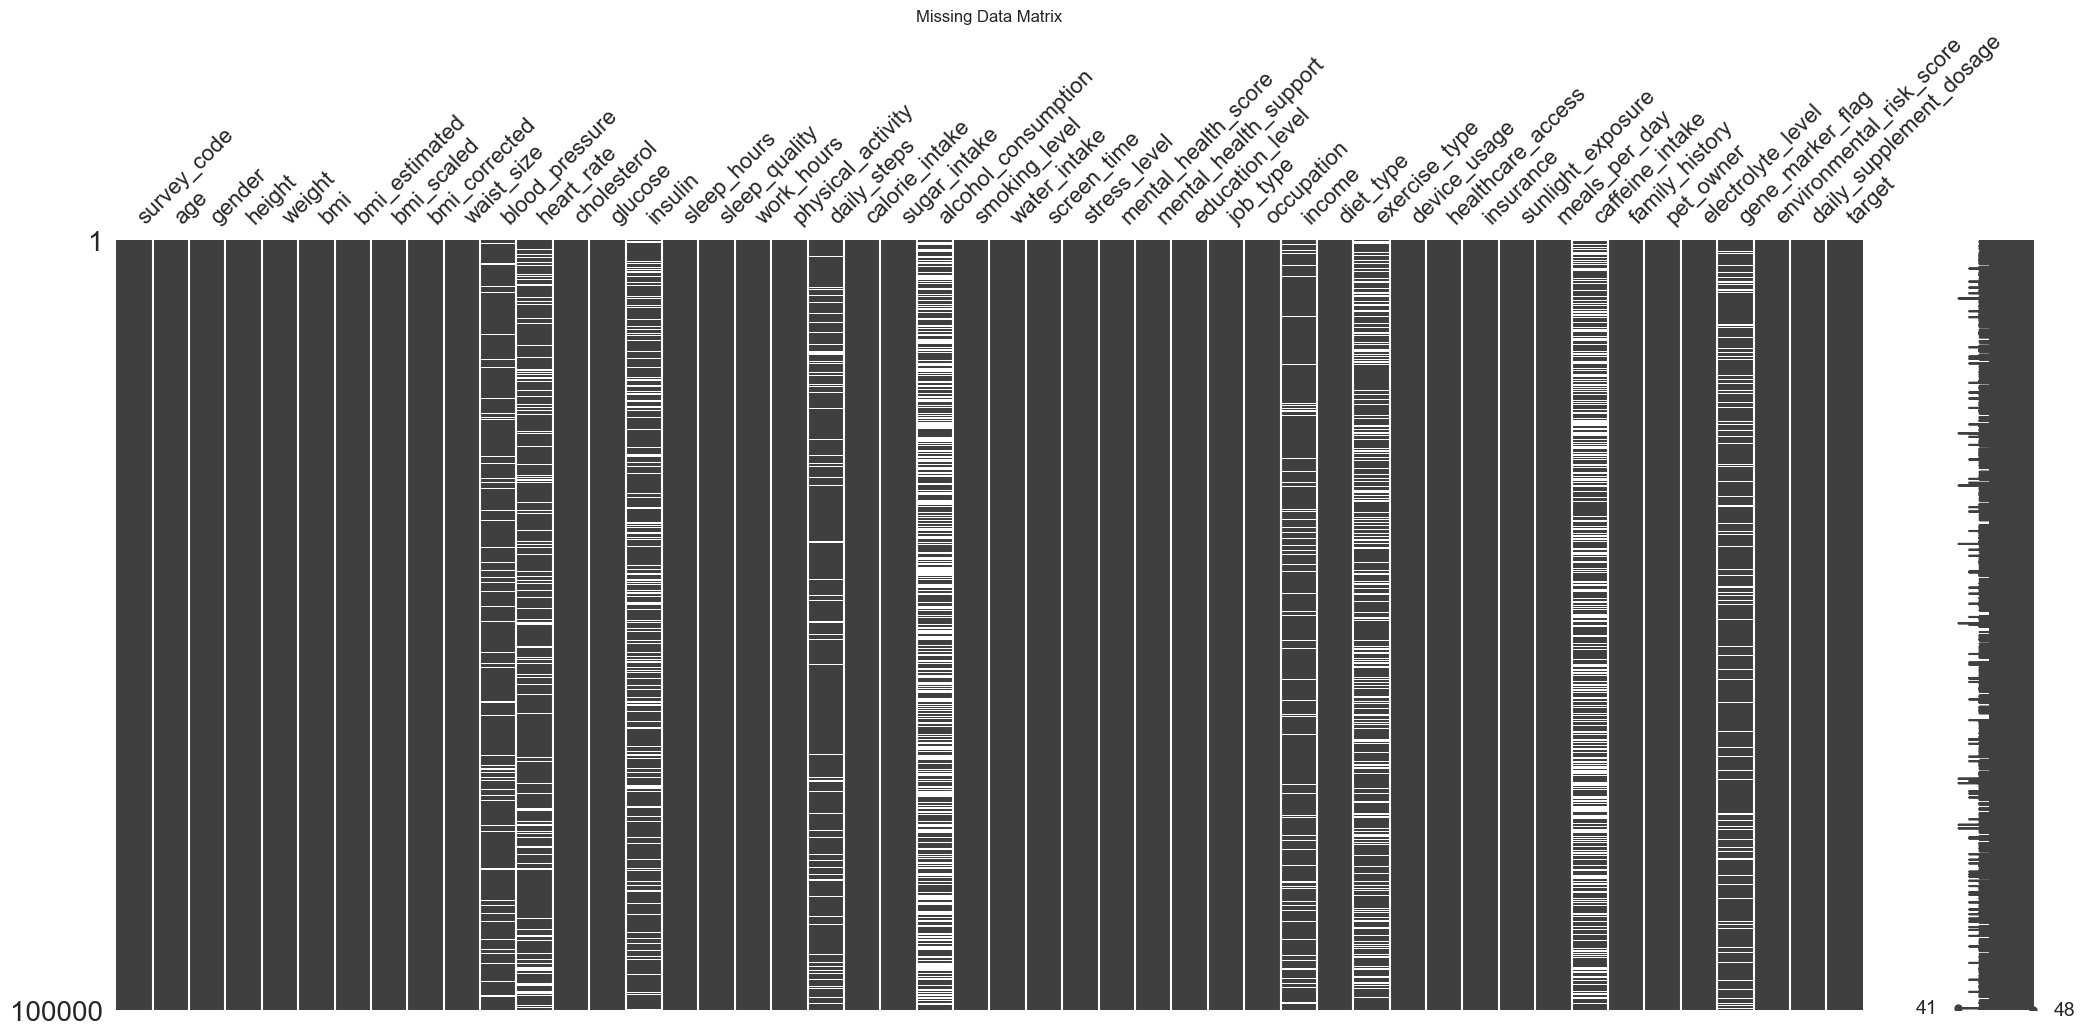

In [ ]:
msno.matrix(data)
plt.title("Missing Data Matrix")
plt.show()

## SUMMARY STATISTICS

In [12]:
print("Summary Statistics")
data.describe(include='all')

Summary Statistics


,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
count,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000,100000.000000,66739,100000,100000,100000.0,89526.0,100000.0,100000.000000,100000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,2,2,2,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Low,NaN,Moderate,Yes,No,NaN,NaN,NaN,NaN,healthy
freq,NaN,NaN,50132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33468,NaN,33371,50055,50153,NaN,NaN,NaN,NaN,70097
mean,50000.500000,48.525990,NaN,170.023707,70.064862,24.493876,24.493876,73.481627,24.494140,84.933043,...,NaN,2.998720,NaN,NaN,NaN,0.0,1.0,5.5,0.015726,NaN
std,28867.657797,17.886768,NaN,9.982798,14.693667,5.951069,5.951069,17.853206,5.954184,12.040314,...,NaN,1.414786,NaN,NaN,NaN,0.0,0.0,0.0,5.764489,NaN
min,1.000000,18.000000,NaN,140.000000,40.000000,9.988495,9.988495,29.965484,9.893845,34.093185,...,NaN,1.000000,NaN,NaN,NaN,0.0,1.0,5.5,-9.999895,NaN
25%,25000.750000,33.000000,NaN,163.306615,59.856938,20.271405,20.271405,60.814215,20.271059,76.795185,...,NaN,2.000000,NaN,NaN,NaN,0.0,1.0,5.5,-4.980501,NaN
50%,50000.500000,48.000000,NaN,170.016778,69.924141,24.156734,24.156734,72.470201,24.151699,84.957139,...,NaN,3.000000,NaN,NaN,NaN,0.0,1.0,5.5,0.015589,NaN
75%,75000.250000,64.000000,NaN,176.728920,80.027418,28.258696,28.258696,84.776088,28.247648,93.018713,...,NaN,4.000000,NaN,NaN,NaN,0.0,1.0,5.5,5.008424,NaN


## Histograms for numerical features

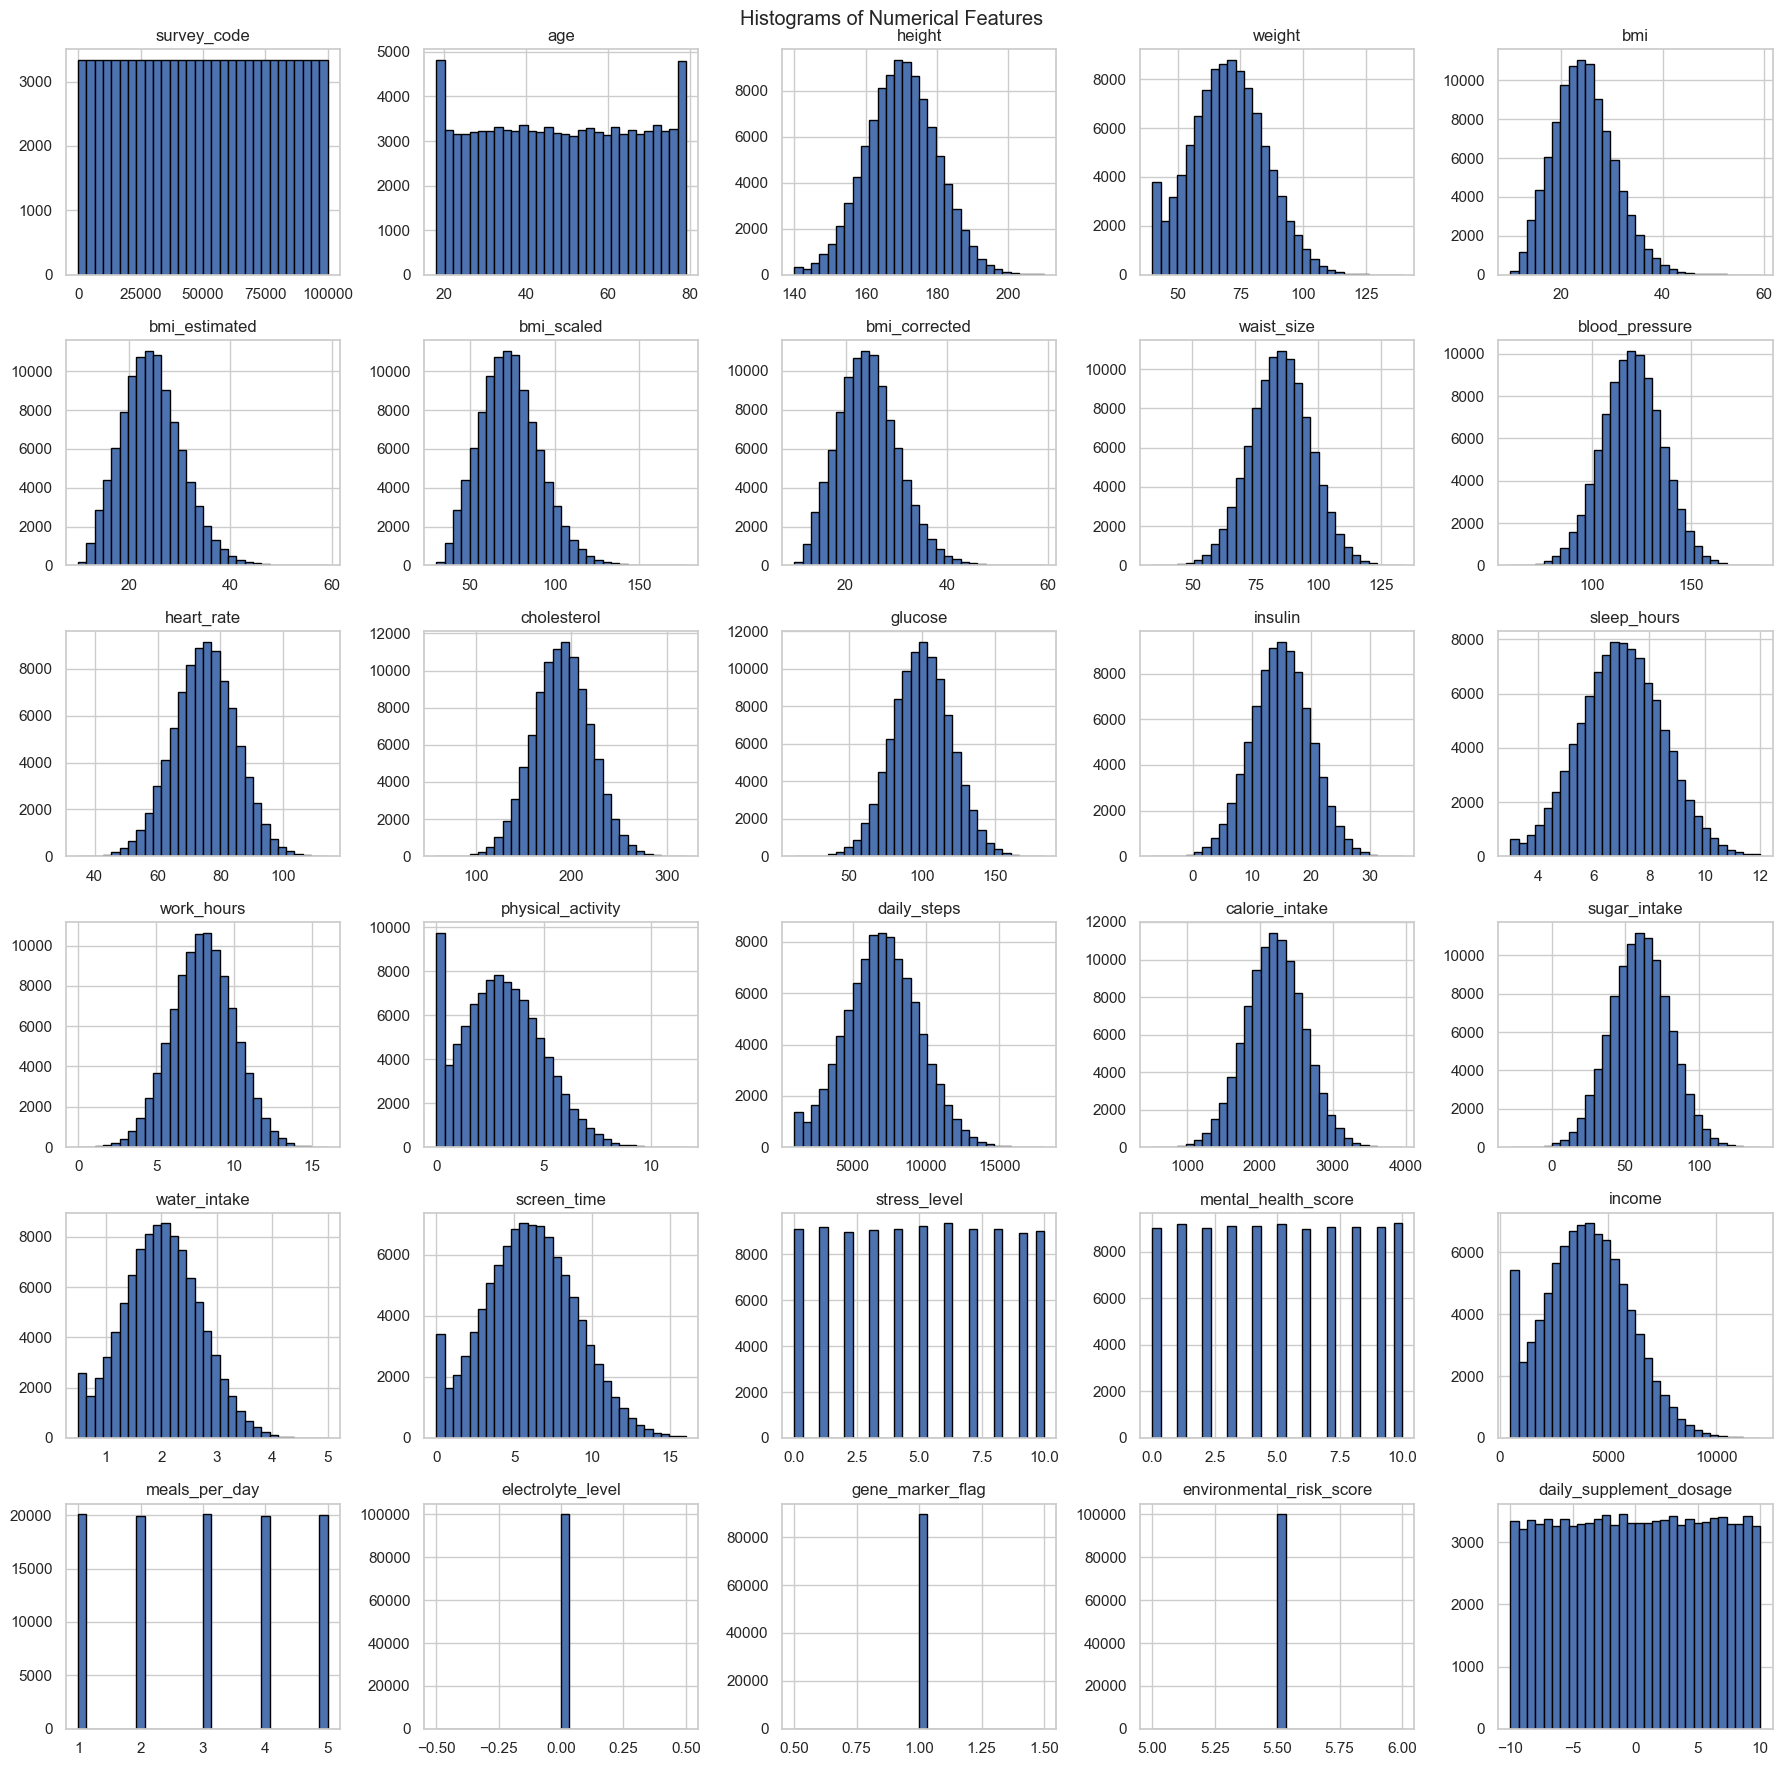

In [14]:
# Numerical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# Categorical columns
cat_cols = data.select_dtypes(include='object').columns.tolist()

data[numeric_cols].hist(figsize=(18, 18), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

## Count plots for categorical features

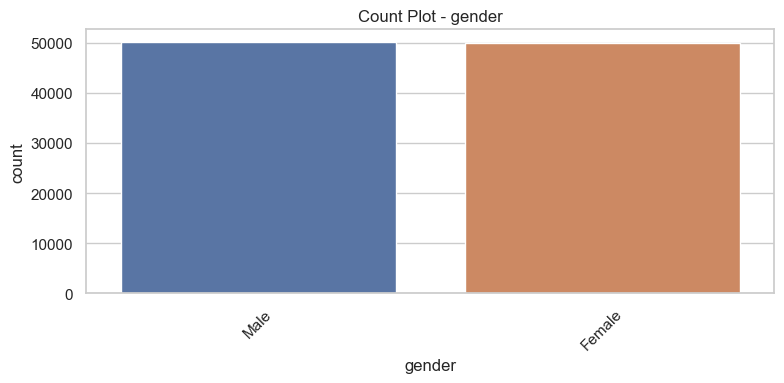

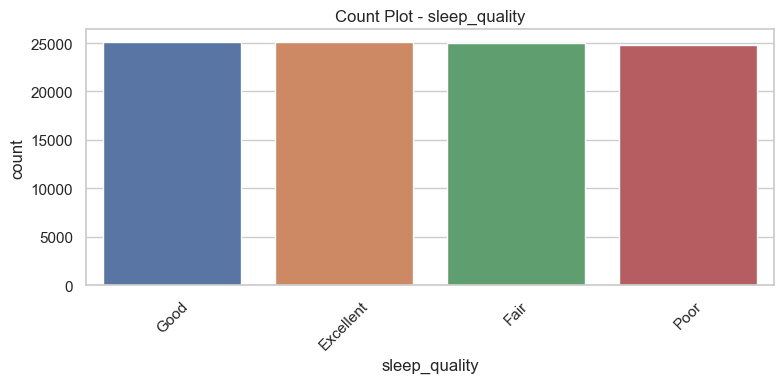

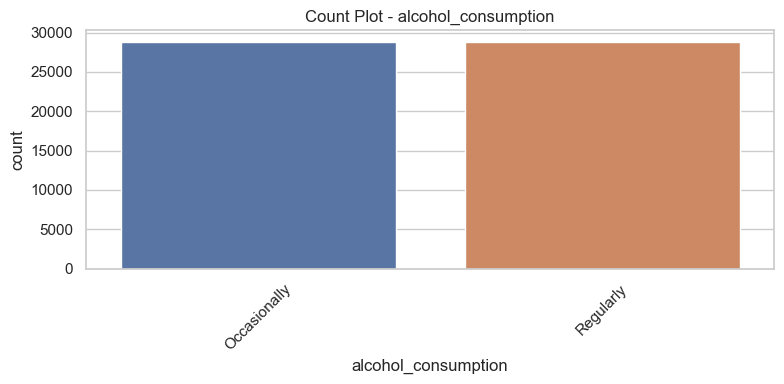

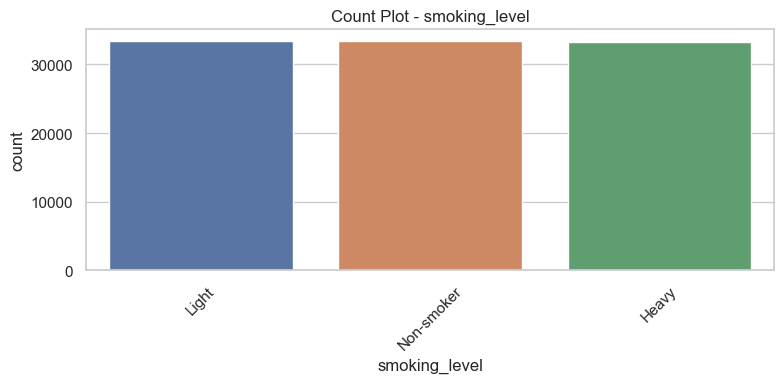

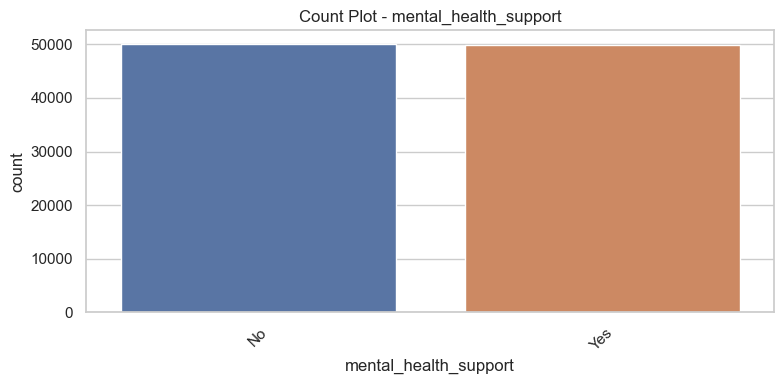

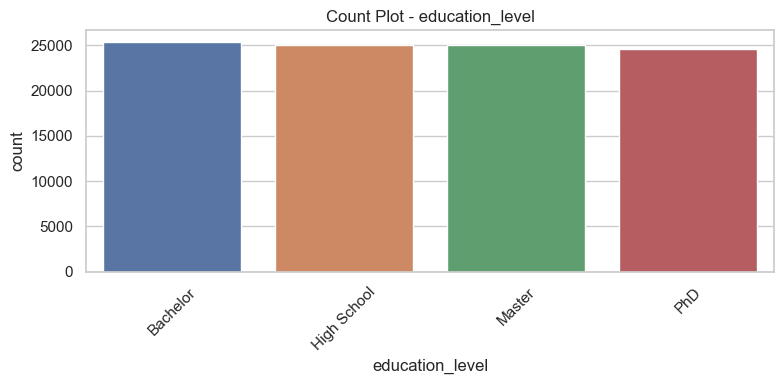

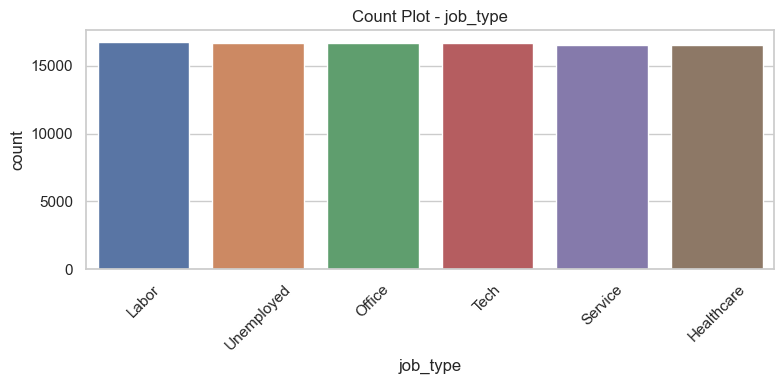

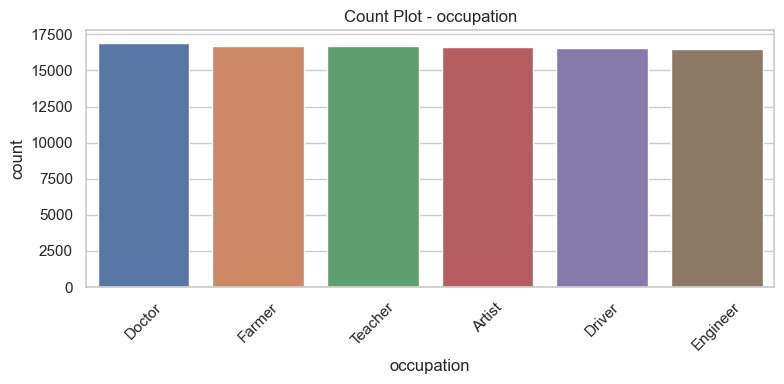

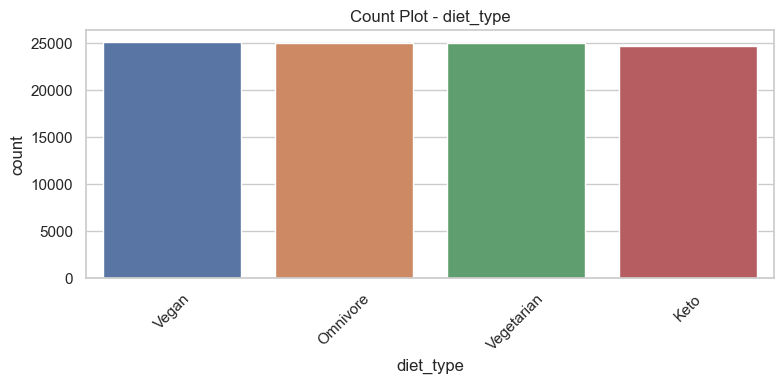

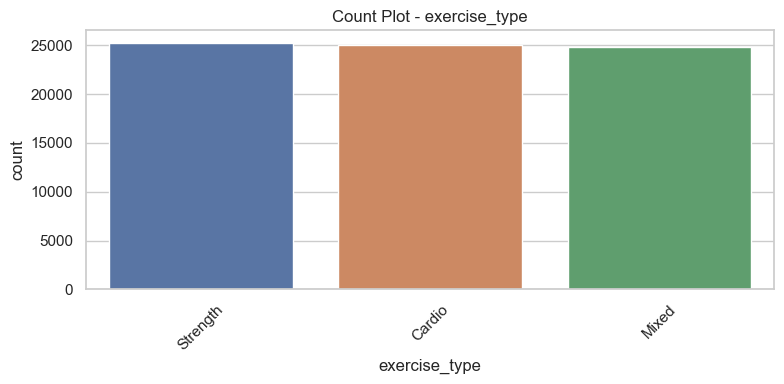

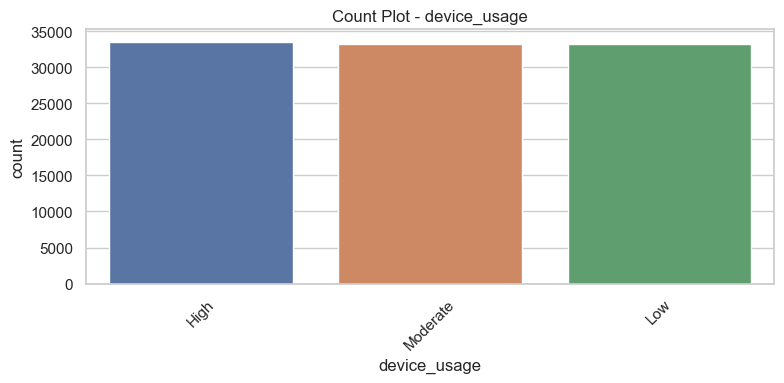

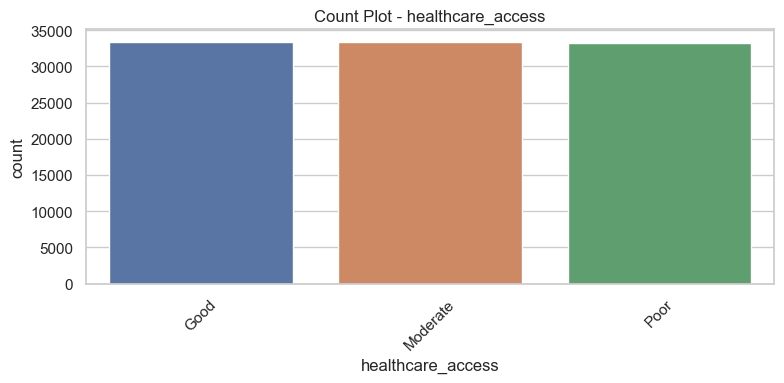

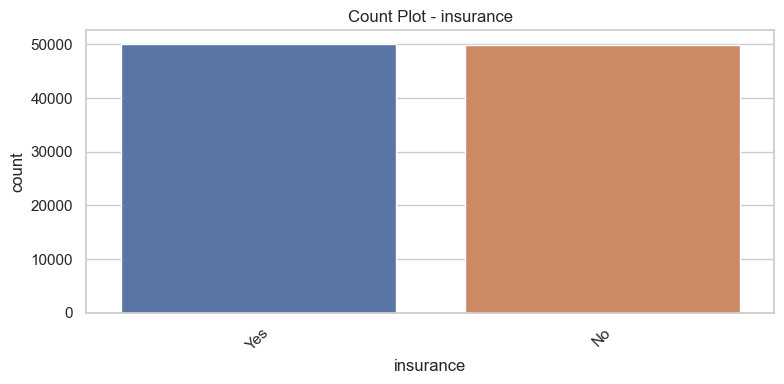

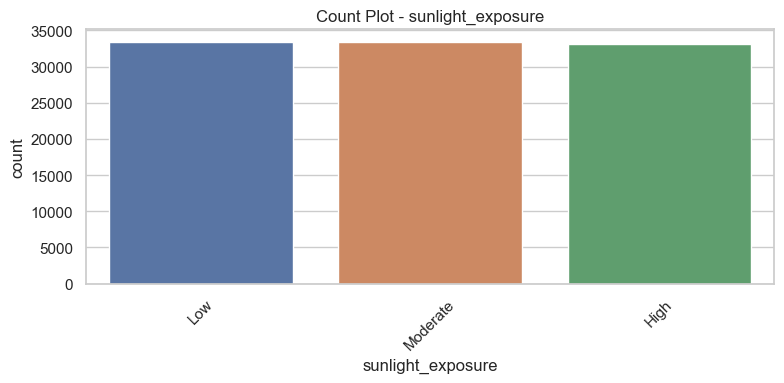

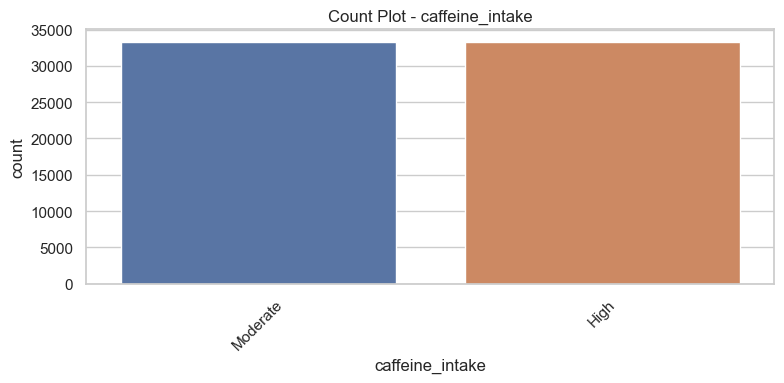

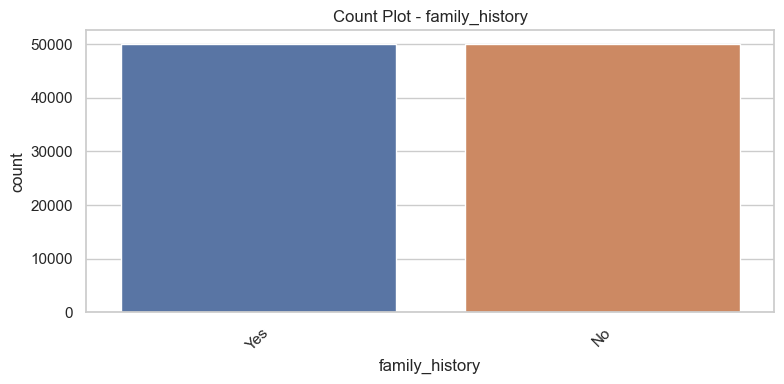

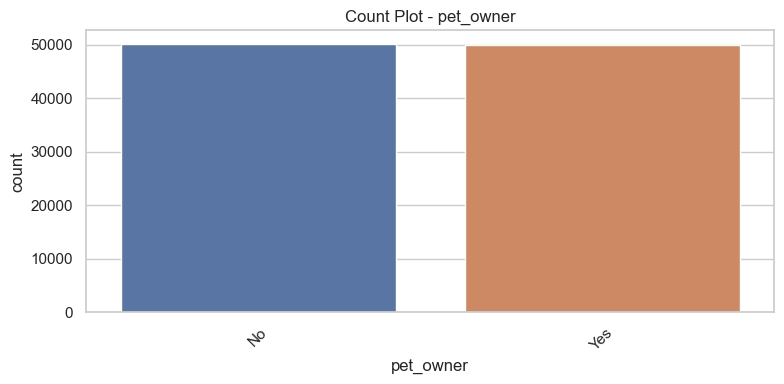

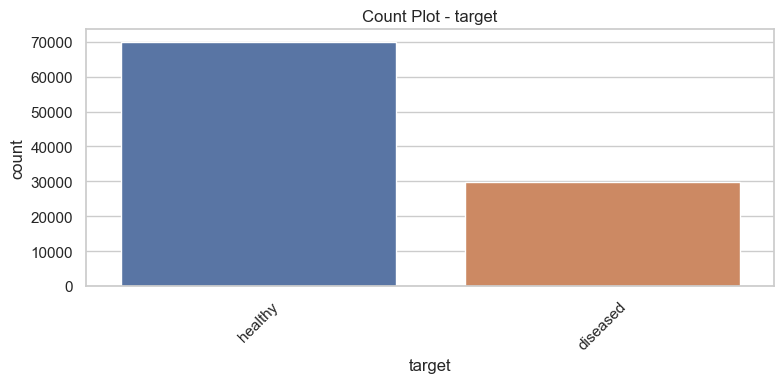

In [15]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Count Plot - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## TARGET DISTRIBUTION

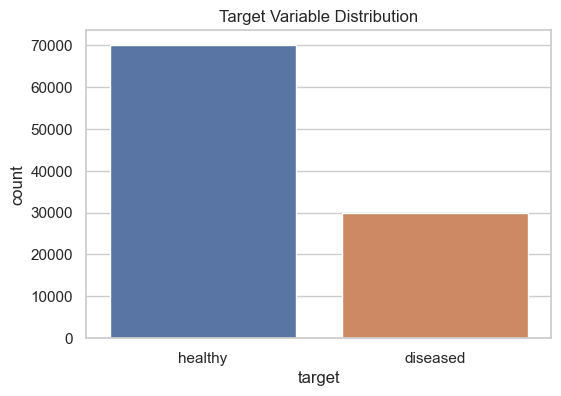

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='target')
plt.title("Target Variable Distribution")
plt.show()

## OUTLIER DETECTION

In [20]:
z_scores = data[numeric_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()
print("Outlier Count (Z-Score > 3) ")
print(outliers[outliers > 0])

Outlier Count (Z-Score > 3) 
height               295
weight               162
bmi                  447
bmi_estimated        447
bmi_scaled           447
bmi_corrected        454
waist_size           264
cholesterol          265
glucose              264
sleep_hours          134
work_hours           237
physical_activity    225
calorie_intake       285
sugar_intake         252
water_intake         154
screen_time          160
dtype: int64
